In [49]:
"""Hypothesis: Prices of housing went up post-covid"""


import geopy as gp
from geopy import distance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display, HTML

import plotly.express as px

In [2]:
fn='/Users/mlid/Downloads/londonCoors.xlsx'

In [3]:
url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"

properties = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col= None)

In [4]:
df = pd.read_excel(fn)

In [5]:
print(df.head())

      Borough         Co-ordinates  Number
0  Hillingdon  51.5441°N, 0.4760°W      33
1      Harrow   51.5898°N 0.3346°W      32
2      Barnet   51.6252°N 0.1517°W      31
3     Enfield   51.6538°N 0.0799°W      30
4    Haringey   51.6000°N 0.1119°W      29


In [6]:
df=df.set_index('Number')

In [7]:
df=df.sort_index(ascending=True)

In [8]:
df

,Borough,Co-ordinates
Number,,
1,City of London,51.5155°N 0.0922°W
2,Westminster,51.4973°N 0.1372°W
3,Kensington & Chelsea,51.5020°N 0.1947°W
4,Hammersmith & Fulham,51.4927°N 0.2339°W
5,Wandsworth,51.4567°N 0.1910°W
6,Lambeth,51.4607°N 0.1163°W
7,Southwark,51.5035°N 0.0804°W
8,Tower Hamlets,51.5099°N 0.0059°W
9,Hackney,51.5450°N 0.0553°W


In [9]:
london=df.iloc[0,1]

In [10]:
df['points']=df['Co-ordinates'].apply(lambda p: gp.Point(p))

In [11]:
df['distFromLon (km)']=df['points'].apply(lambda p: gp.distance.geodesic(p,london).km)

In [12]:
dT=properties.T
dT=dT.rename(index={'Unnamed: 0': 'London_Borough'})
dTlocs=dT.index
dTcols=list(dT.columns.values)
dT.index=(dT[0])
dT[0]=dTlocs
dT.dropna()
relevantBs=dT[1:33]

In [13]:
relevantBs=relevantBs.set_index(0)

In [14]:
t2=df.merge(relevantBs,left_on='Borough',right_on=0,how='inner')

In [15]:
# t2

In [16]:
colDf=lambda i : relevantBs[i]-relevantBs[i-1]

In [17]:
##Calculates MoM average price.

tmpDf=[]
tmpDfperc=[]
for i in range(2,relevantBs.shape[1]+1):
    tmpDf.append(colDf(i))
    tmpDfperc.append((colDf(i)/relevantBs[i])*100)

tmpDf=pd.concat(tmpDf,axis=1)
tmpDfperc=pd.concat(tmpDfperc,axis=1)

In [18]:
#Percentage of times a specific borough has seen negative MoM price changes

dsp=pd.DataFrame(tmpDf.lt(0).sum(axis=1)*100/344)
# dsp.to_html('temp.html')

In [19]:
#Number of boroughs less than the mean

# df['distFromLon (km)'].lt(df['distFromLon (km)'].mean()).sum()

In [20]:
# orderedDist.set_index('Borough')

In [21]:
rbs=relevantBs.reset_index()

In [22]:
df.index-=1

In [23]:
rbDf=rbs.reset_index().join(df['distFromLon (km)'])

In [24]:
rbDf=rbDf.fillna(0)

In [25]:
rbDf=rbDf.sort_values('distFromLon (km)')

In [26]:
closerBs=rbDf[0:16]
furtherBs=rbDf[16:]

In [27]:
rbDf

,index,0,1,2,3,4,5,6,7,8,...,338,339,340,341,342,343,344,345,346,distFromLon (km)
0,0,City of London,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.04230,112329.43760,...,868654,931058,905101,960392,982370,960158,888278,875234,948692,0.000000
6,6,Camden,120932.88810,119508.86220,120282.21310,120097.89900,119929.27820,121887.46250,124027.57680,125529.80390,...,870187,855337,870647,853825,872180,845434,857874,830524,820541,1.566402
10,10,Greenwich,62300.10169,60993.26863,61377.83464,61927.72460,63512.99103,64751.56404,65486.34112,65076.43195,...,440150,435674,421376,405551,407847,418014,433850,429011,426081,2.756412
9,9,Enfield,72514.69096,73155.19746,72190.44144,71442.92235,70630.77955,71348.31147,71837.54011,72237.94562,...,442967,436353,434394,435287,434611,439328,444642,449901,450106,2.985616
1,1,Barking & Dagenham,50460.22660,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,...,346059,344693,347710,348002,343972,340763,343731,344255,334460,3.723168
8,8,Ealing,79885.89069,80897.06551,81379.86288,82188.90498,82077.05525,81630.66181,82352.22260,82706.65927,...,528381,512245,507696,504662,508547,509818,514537,515339,499337,4.162848
7,7,Croydon,69158.16225,68951.09542,68712.44341,68610.04641,68844.91690,69052.51103,69142.48112,68993.42545,...,427422,419254,409618,406078,402962,406623,413175,419400,401511,6.023360
5,5,Bromley,81671.47692,81657.55944,81449.31143,81124.41227,81542.61561,82382.83435,82898.52264,82054.37156,...,503461,496542,497231,494138,496422,500377,504524,505185,512900,6.322540
2,2,Barnet,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,...,603522,596521,585644,572257,570542,575808,586501,589399,597538,7.273068
20,20,Kingston upon Thames,80875.84843,81230.13524,81111.48848,81672.80476,82123.51084,82205.66822,82525.79300,83342.84552,...,550759,553117,546915,546766,542079,536956,540952,542536,557043,9.257906


In [28]:
tmpDfperc

,0,1,2,3,4,5,6,7,8,9,...,335,336,337,338,339,340,341,342,343,344
0,,,,,,,,,,,,,,,,,,,,,
City of London,-11.248053,-3.895403,-2.619277,8.65776,11.055117,13.827114,1.959767,-7.519952,3.299769,8.158665,...,-1.293688,-10.823642,6.702483,-2.867857,5.757128,2.237243,-2.313369,-8.092061,-1.490344,7.743082
Barking & Dagenham,1.224515,0.357311,3.509152,-0.172045,1.225504,-3.045733,0.227976,-1.477679,0.081811,-1.307959,...,-0.817414,-1.741611,-0.396295,0.867677,0.083908,-1.171607,-0.94171,0.863466,0.152213,-2.928601
Barnet,-0.101243,-1.021865,-1.635745,-0.559368,-0.167318,1.458874,0.996161,0.977567,-0.762404,-1.853175,...,0.580331,0.954398,-1.173638,-1.857272,-2.339334,-0.300591,0.914541,1.823185,0.491687,1.362089
Bexley,-0.262656,-0.653167,-0.139745,-0.438352,0.397165,-0.831137,1.101771,0.119281,0.031597,-1.071176,...,-1.554264,-0.325722,-1.42842,-0.756414,-1.825453,-0.425555,0.904833,-0.029688,0.572397,0.924911
Brent,0.993714,-0.009025,1.301802,1.001867,0.816082,-0.247472,-0.788607,0.32864,-0.717254,-0.662318,...,-0.393901,-3.050443,-1.56156,-0.293593,-0.357274,0.625824,-0.290222,4.878795,0.388951,-2.155973
Bromley,-0.017044,-0.255678,-0.400495,0.512865,1.019895,0.622072,-1.02877,-0.753853,0.515172,0.842579,...,-0.669492,-0.989948,-1.393437,0.138567,-0.625939,0.460092,0.790404,0.821963,0.130843,1.504192
Camden,-1.191565,0.642947,-0.15347,-0.1406,1.606551,1.725515,1.19671,-4.090449,-2.671888,-1.767175,...,0.159312,1.249042,-1.736158,1.758462,-1.970193,2.104497,-3.163582,1.450096,-3.293102,-1.216636
Croydon,-0.30031,-0.34732,-0.149245,0.341159,0.300632,0.130123,-0.216043,0.576531,-0.665686,-0.079655,...,0.496176,-0.76552,-1.948222,-2.352436,-0.871754,-0.773274,0.900343,1.585769,1.484263,-4.45542
Ealing,1.249952,0.593264,0.984369,-0.136274,-0.546845,0.876189,0.428547,-0.848149,-1.848451,-1.577239,...,-0.14763,-0.250388,-3.150055,-0.896009,-0.601194,0.763941,0.249305,0.917135,0.155626,-3.204649


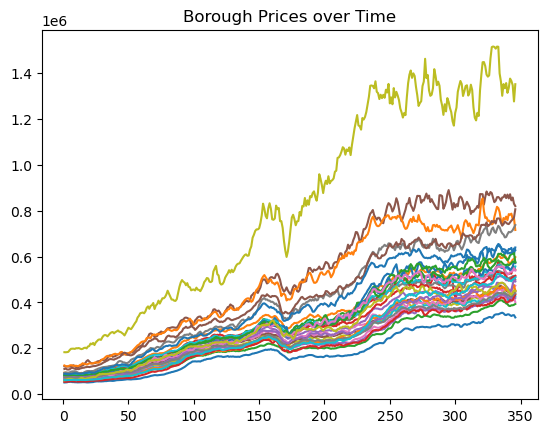

In [29]:
plt.plot(relevantBs[1:].T)
plt.title('Borough Prices over Time')
plt.show()

In [30]:
# diffVec=relevantBs[345]-relevantBs[1]
# diffVec=np.array([diffVec])
# indx = np.argpartition(diffVec, -5)[-5:]
# # diffVec.shape

# print(indx)
# # Return indices
# res = diffVec[indx]

# print(res)

In [34]:
tmpDf.cumsum(axis=1)

,0,1,2,3,4,5,6,7,8,9,...,335,336,337,338,339,340,341,342,343,344
0,,,,,,,,,,,,,,,,,,,,,
City of London,-9246.21173,-12328.28231,-14347.77683,-7039.83555,3451.52757,18679.05743,20880.45273,13024.12473,16589.13323,26186.62913,...,871225.01513,777205.01513,839609.01513,813652.01513,868943.01513,890921.01513,868709.01513,796829.01513,783785.01513,857243.01513
Barking & Dagenham,625.55323,808.74296,2673.27866,2582.02192,3240.12171,1652.89497,1771.97208,1011.38693,1053.531,388.45127,...,301625.7734,295598.7734,294232.7734,297249.7734,297541.7734,293511.7734,290302.7734,293270.7734,293794.7734,283999.7734
Barnet,-94.34869,-1036.99397,-2521.6434,-3026.51799,-3177.28361,-1843.27064,-923.2032,-11.39587,-717.13334,-2401.35707,...,504477.48168,510237.48168,503236.48168,492359.48168,478972.48168,477257.48168,482523.48168,493216.48168,496114.48168,504253.48168
Bexley,-170.16967,-590.59692,-680.42155,-960.95448,-705.76701,-1235.38981,-525.49031,-448.54269,-428.15311,-1112.05666,...,337611.90964,336304.90964,330653.90964,327683.90964,320644.90964,319010.90964,322516.90964,322401.90964,324631.90964,328268.90964
Brent,715.69499,709.19576,1659.06396,2397.48045,3003.91469,2820.4709,2240.47412,2482.97589,1957.48687,1475.4383,...,480355.43302,464025.43302,455794.43302,454251.43302,452380.43302,455678.43302,454153.43302,481104.43302,483261.43302,471557.43302
Bromley,-13.91748,-222.16549,-547.06465,-128.86131,711.35743,1227.04572,382.89464,-231.04684,190.68395,886.29858,...,426773.52308,421789.52308,414870.52308,415559.52308,412466.52308,414750.52308,418705.52308,422852.52308,423513.52308,431228.52308
Camden,-1424.0259,-650.675,-834.9891,-1003.6099,954.5744,3094.6887,4596.9158,-336.037,-3474.3959,-5514.0485,...,738385.1119,749254.1119,734404.1119,749714.1119,732892.1119,751247.1119,724501.1119,736941.1119,709591.1119,699608.1119
Croydon,-207.06683,-445.71884,-548.11584,-313.24535,-105.65122,-15.68113,-164.7368,235.33798,-223.54991,-278.41591,...,361535.83775,358263.83775,350095.83775,340459.83775,336919.83775,333803.83775,337464.83775,344016.83775,350241.83775,332352.83775
Ealing,1011.17482,1493.97219,2303.01429,2191.16456,1744.77112,2466.33191,2820.76858,2125.19202,636.76985,-613.54451,...,449818.10931,448495.10931,432359.10931,427810.10931,424776.10931,428661.10931,429932.10931,434651.10931,435453.10931,419451.10931


In [35]:
lst=[0.1865530237215323,
 0.2031506829950872,
 0.22767858352744275,
 0.23342505427984456,
 0.20194037630771233,
 0.2418750472199296,
 0.20266979018130085,
 0.2356901109638676,
 0.2312347720059324,
 0.2336344932412798,
 0.20789311864129992,
 0.1591879415667593,
 0.2404707793640174,
 0.19373303029045455,
 0.2442760761461356,
 0.22961054730948405,
 0.23635179169692055,
 0.2492858397689723,
 0.20439595996303264,
 0.1964634916904271,
 0.23252018956439635,
 0.19947058467045872,
 0.18267753453916727,
 0.2100266611046671,
 0.1872116609159464,
 0.22300689473290425,
 0.24621185459796358,
 0.1789317277535508,
 0.24111343121969114,
 0.21234586253457458,
 0.17023055505257234,
 0.20871076380852469]

In [37]:
dfLst=pd.DataFrame(lst)

In [54]:
# dfLst.index

ratioDistance=dfLst.join(df['distFromLon (km)'])
ratioDistance.columns=['Ratio Perc', 'Distance from London (km)']

In [66]:
fig = px.bar(ratioDistance, y='Ratio Perc', x='Distance from London (km)')
fig.update_traces(marker_color='black',width=.1)
fig.show()

In [101]:
import random

def hex_to_rgb(hex):
  rgb = []
  for i in (0, 2, 4):
    decimal = int(hex[i:i+2], 16)
    rgb.append(decimal)
  
  return tuple(rgb)

# Generating a random number in between 0 and 2^24
clr=[]
for i in range(0,33):
    color = random.randrange(0, 2**24)

    # Converting that number from base-10 (decimal) to base-16 (hexadecimal)
    hex_color = hex(color)

    std_color = hex_color[2:]
    
    clr.append(hex_to_rgb(std_color))

    
print(clr)

[(180, 119, 222), (118, 229, 81), (167, 138, 27), (236, 255, 238), (62, 23, 158), (34, 61, 168), (160, 139, 223), (65, 127, 7), (197, 150, 196), (158, 217, 239), (28, 199, 219), (43, 22, 47), (138, 70, 249), (112, 55, 43), (174, 25, 157), (115, 253, 78), (52, 87, 230), (243, 20, 9), (174, 90, 91), (32, 187, 151), (222, 241, 154), (213, 9, 115), (95, 142, 12), (71, 90, 9), (184, 178, 127), (212, 254, 168), (245, 209, 93), (241, 124, 198), (135, 95, 192), (118, 144, 148), (70, 98, 36), (238, 217, 91), (50, 56, 1)]


In [72]:
clr=pd.DataFrame(clr)

In [77]:
rtDist=ratioDistance.join(clr)

In [80]:
rtDist.columns=['Ratio Perc', 'Distance from London (km)', 'color']

In [90]:
marker_dict = {'color': clr}
# fig = px.bar(x=categories, y=values, marker=marker_dict)
fig = px.bar(ratioDistance, y='Ratio Perc', x='Distance from London (km)',color_discrete_sequence=clr)
fig.update_traces(width=.1)
fig.show()

ValueError: RGBA values should be within 0-1 range

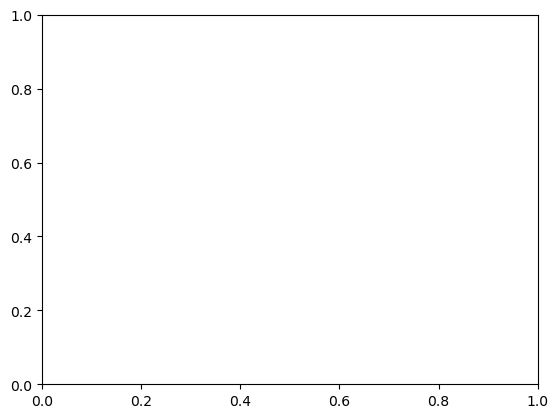

In [103]:
fig, ax = plt.subplots()
ax.bar(ratioDistance['Distance from London (km)'], ratioDistance['Ratio Perc'],
       color=np.squeeze(clr))

# Show graph
plt.show()